In [ ]:
from google.colab import drive;
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np, pandas as pd, time, matplotlib.pyplot as plt, seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/bookings_03_11.csv', low_memory=False).drop(columns='Unnamed: 0')
df['date_book'] = pd.to_datetime(df['date_book']); df

,id_object,date_book,room_type_agg,rooms,amount,prepay,guests,nights,price_per_night,target,...,Td_mean,Td_min,Td_max,Td_sd,click_search,click_ad,direct_visit,click_socnet,click_link,total_traffic
0,1,2019-01-01,Апартаменты,1.0,26600.000000,0.000000,1.000000,2.000000,13300.000000,1,...,-3.6500,-8.3,1.1,2.839517,4778,0,1017,81,294,6501
1,1,2019-01-01,Коттедж,1.0,59400.000000,59400.000000,1.000000,1.000000,59400.000000,1,...,-3.6500,-8.3,1.1,2.839517,4778,0,1017,81,294,6501
2,1,2019-01-01,Стандарт,1.5,13000.000000,7300.000000,2.000000,1.000000,10150.000000,2,...,-3.6500,-8.3,1.1,2.839517,4778,0,1017,81,294,6501
3,1,2019-01-02,Коттедж,1.0,47900.000000,47900.000000,1.000000,2.000000,23950.000000,1,...,-1.3625,-4.5,-0.1,1.678381,6407,0,1412,146,466,9018
4,1,2019-01-02,Стандарт,1.0,14683.181818,13201.363636,1.818182,1.454545,9277.575455,11,...,-1.3625,-4.5,-0.1,1.678381,6407,0,1412,146,466,9018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19710,6,2024-10-28,Студия,1.0,21375.000000,21375.000000,1.000000,1.500000,14012.500000,2,...,-3.6500,-6.3,-1.8,1.683534,1100,532,439,21,163,2455
19711,6,2024-10-29,Стандарт,1.0,8975.000000,4575.250000,1.500000,1.000000,8975.000000,4,...,-4.2500,-5.5,-3.2,0.814160,1040,805,390,26,160,2577
19712,6,2024-10-29,Студия,1.0,22525.000000,17358.333333,1.666667,2.000000,11775.000000,3,...,-4.2500,-5.5,-3.2,0.814160,1040,805,390,26,160,2577
19713,6,2024-10-30,Стандарт,1.0,25445.000000,9393.727273,1.363636,1.636364,13948.181818,11,...,-3.4125,-5.1,-1.8,1.085538,925,853,366,34,158,2466


# Forecast by hotels

In [ ]:
df = df[['id_object', 'date_book', 'room_type_agg', 'target', 'working_day',
       'week_trend', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday',
       'saturday', 'sunday', 'month_trend', 'year_trend', 'jan', 'feb', 'mar',
       'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'T_mean',
       'T_min', 'T_max', 'T_sd', 'U_mean', 'U_min', 'U_max', 'U_sd', 'Ff_mean',
       'Ff_min', 'Ff_max', 'Ff_sd', 'N_mean', 'N_min', 'N_max', 'N_sd',
       'Nh_mean', 'Nh_min', 'Nh_max', 'Nh_sd', 'H_mean', 'H_min', 'H_max',
       'H_sd', 'VV_mean', 'VV_min', 'VV_max', 'VV_sd', 'Td_mean', 'Td_min',
       'Td_max', 'Td_sd']]

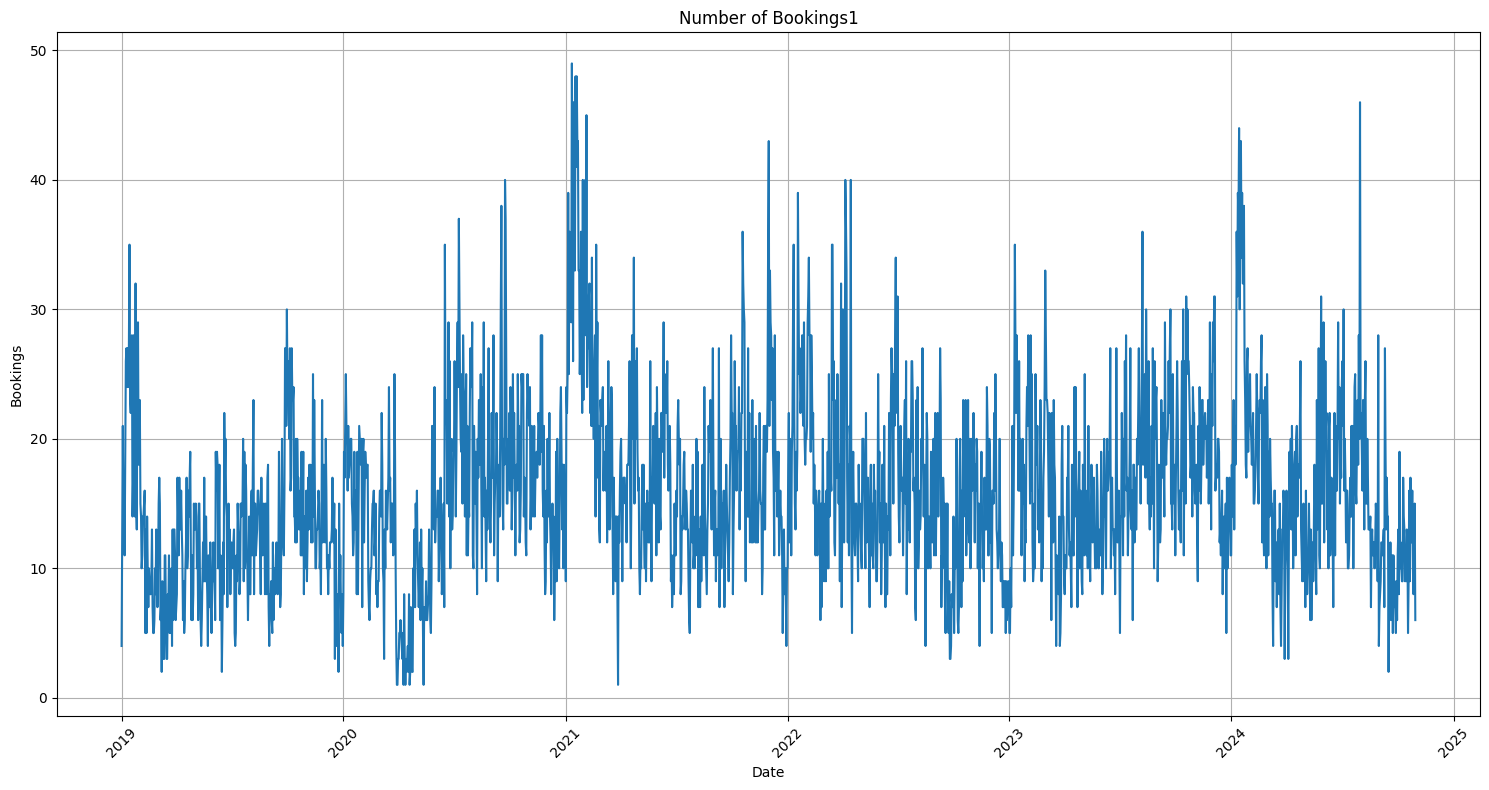

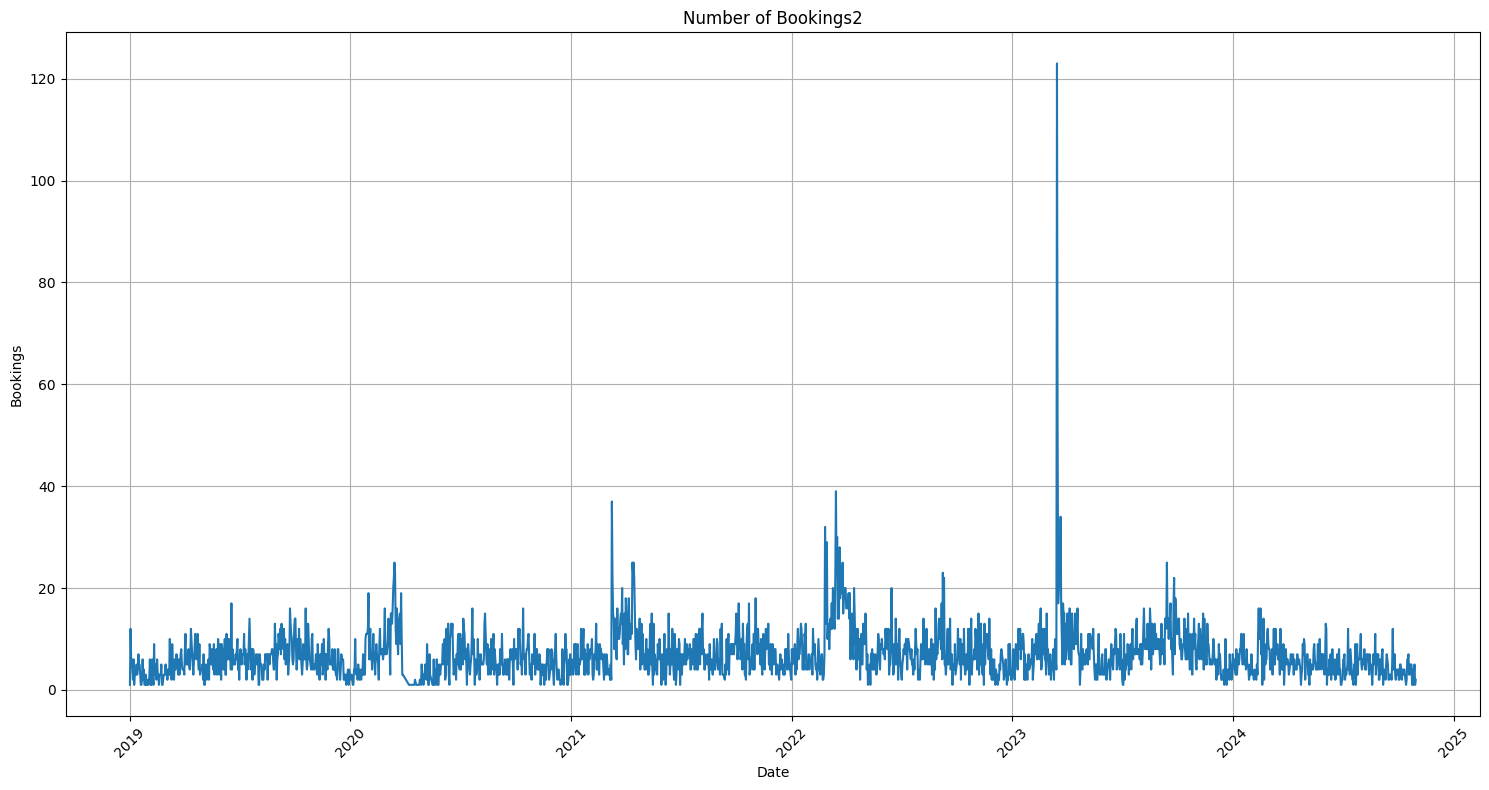

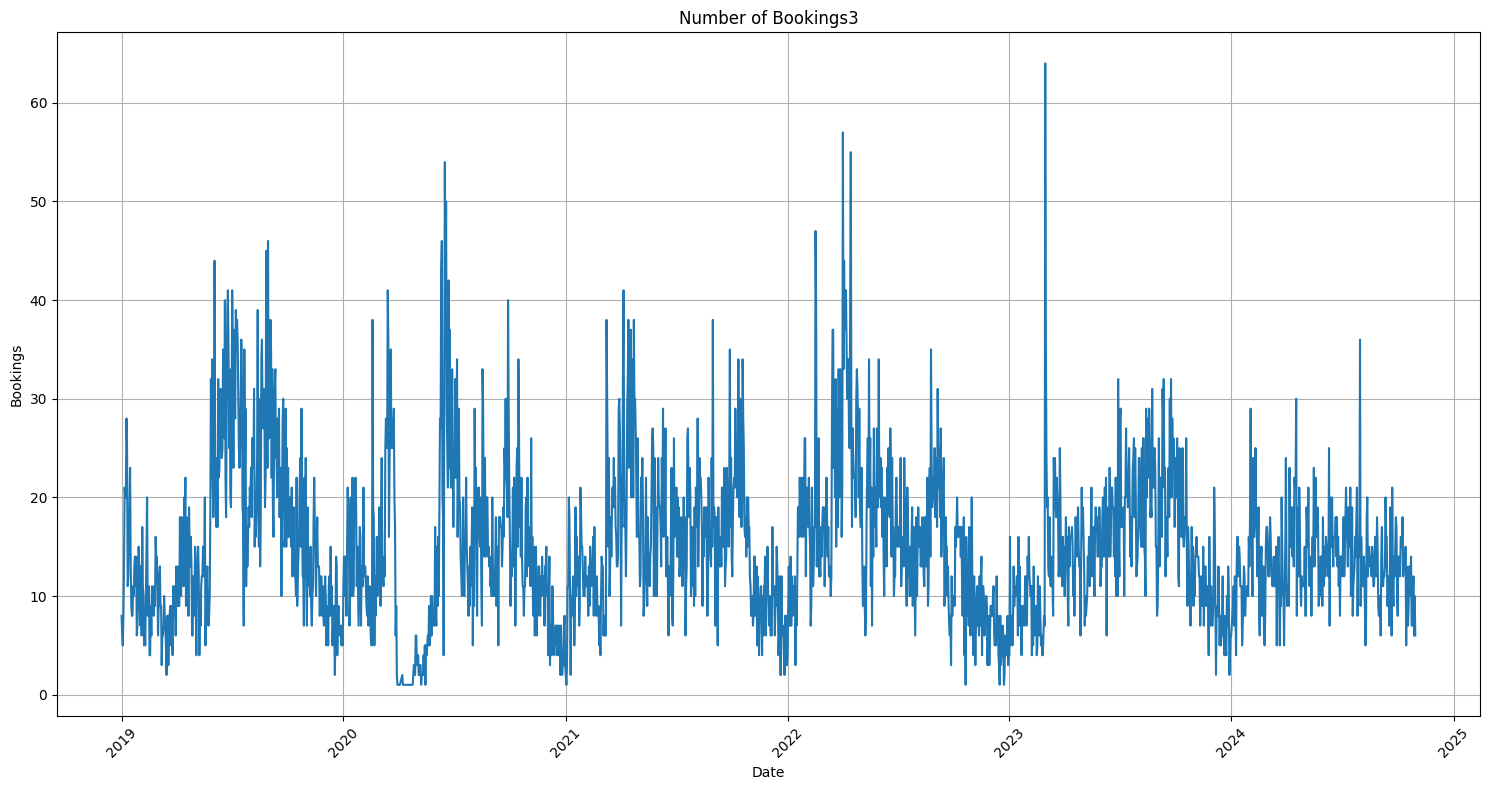

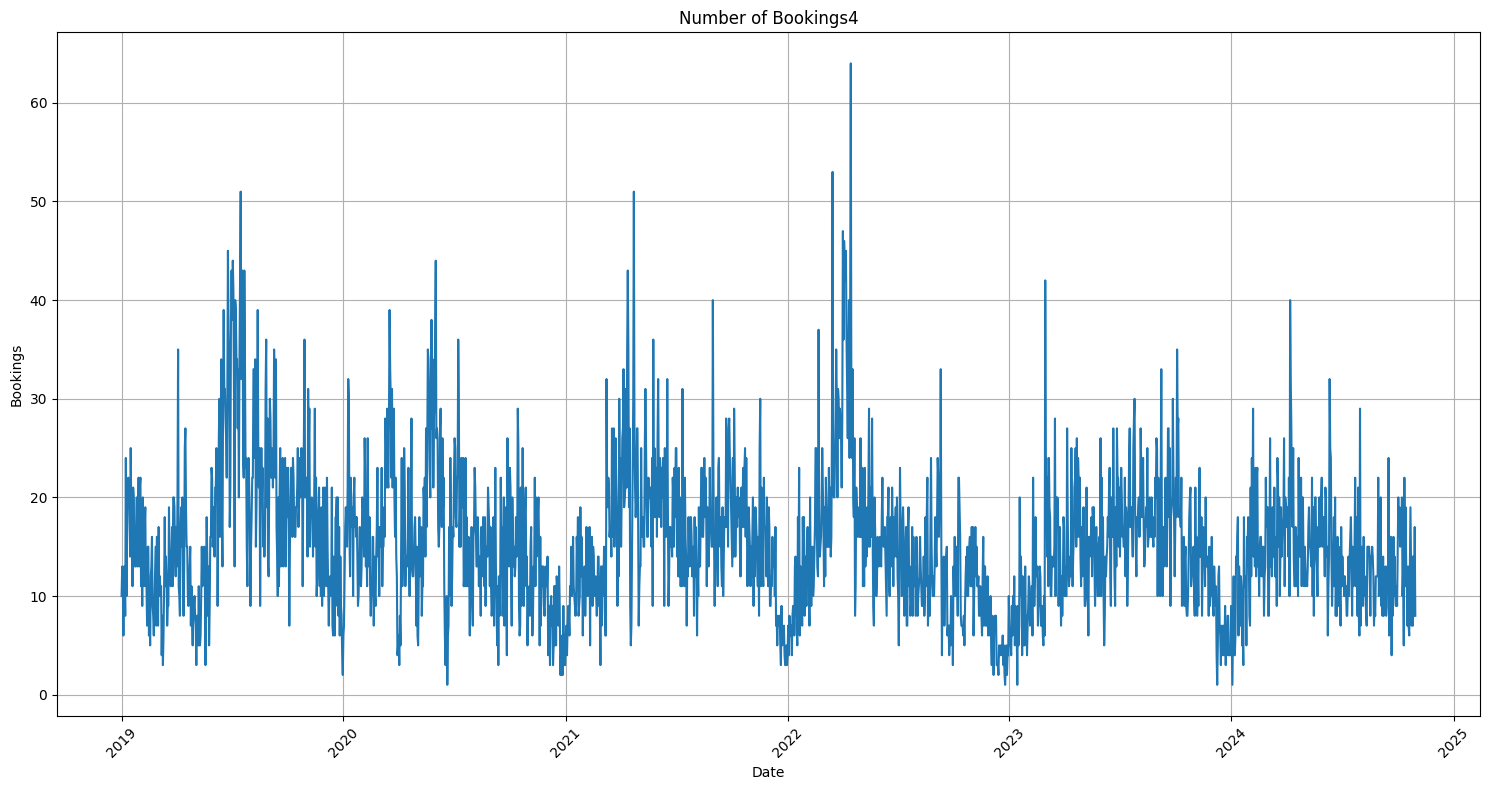

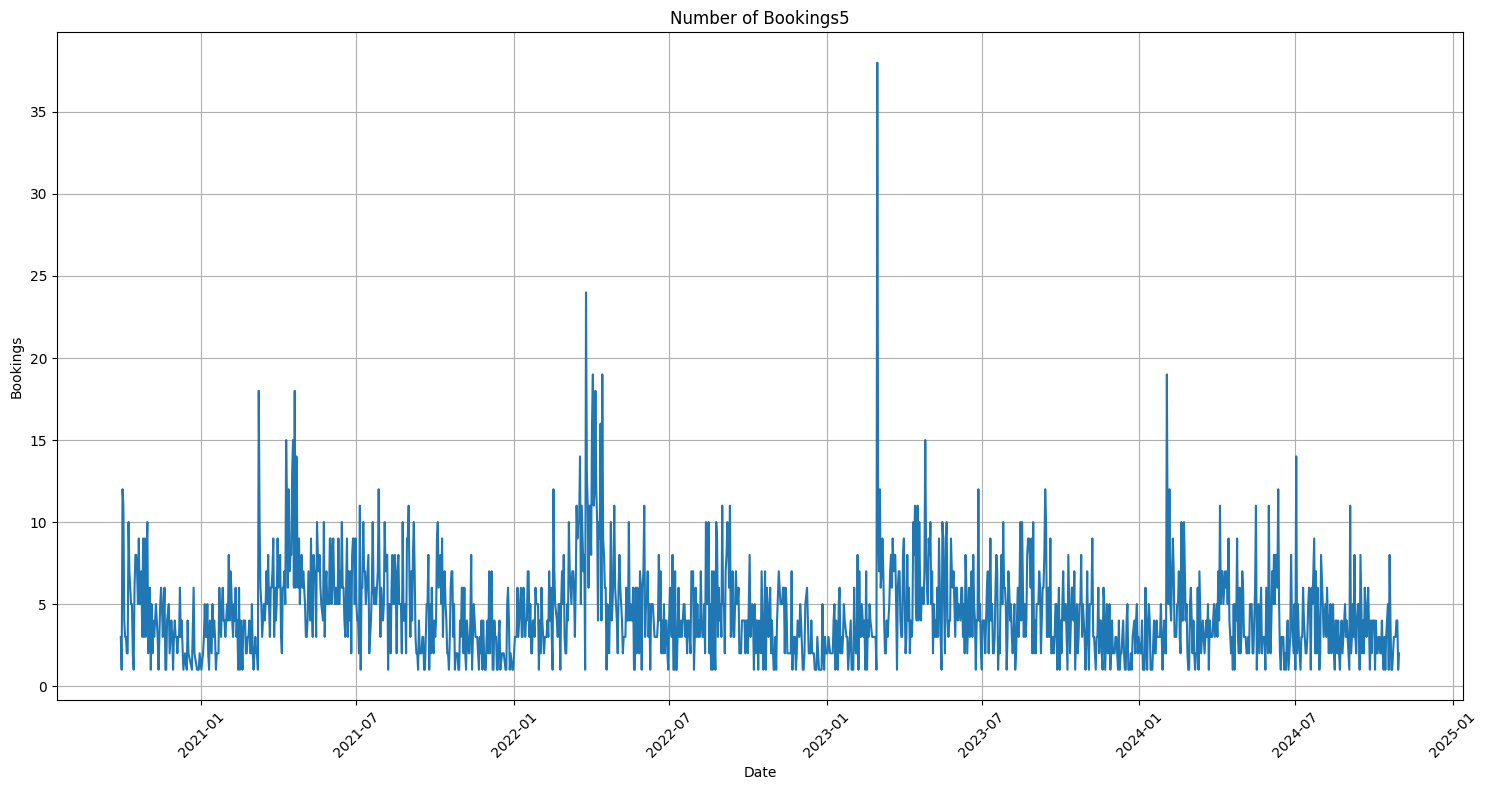

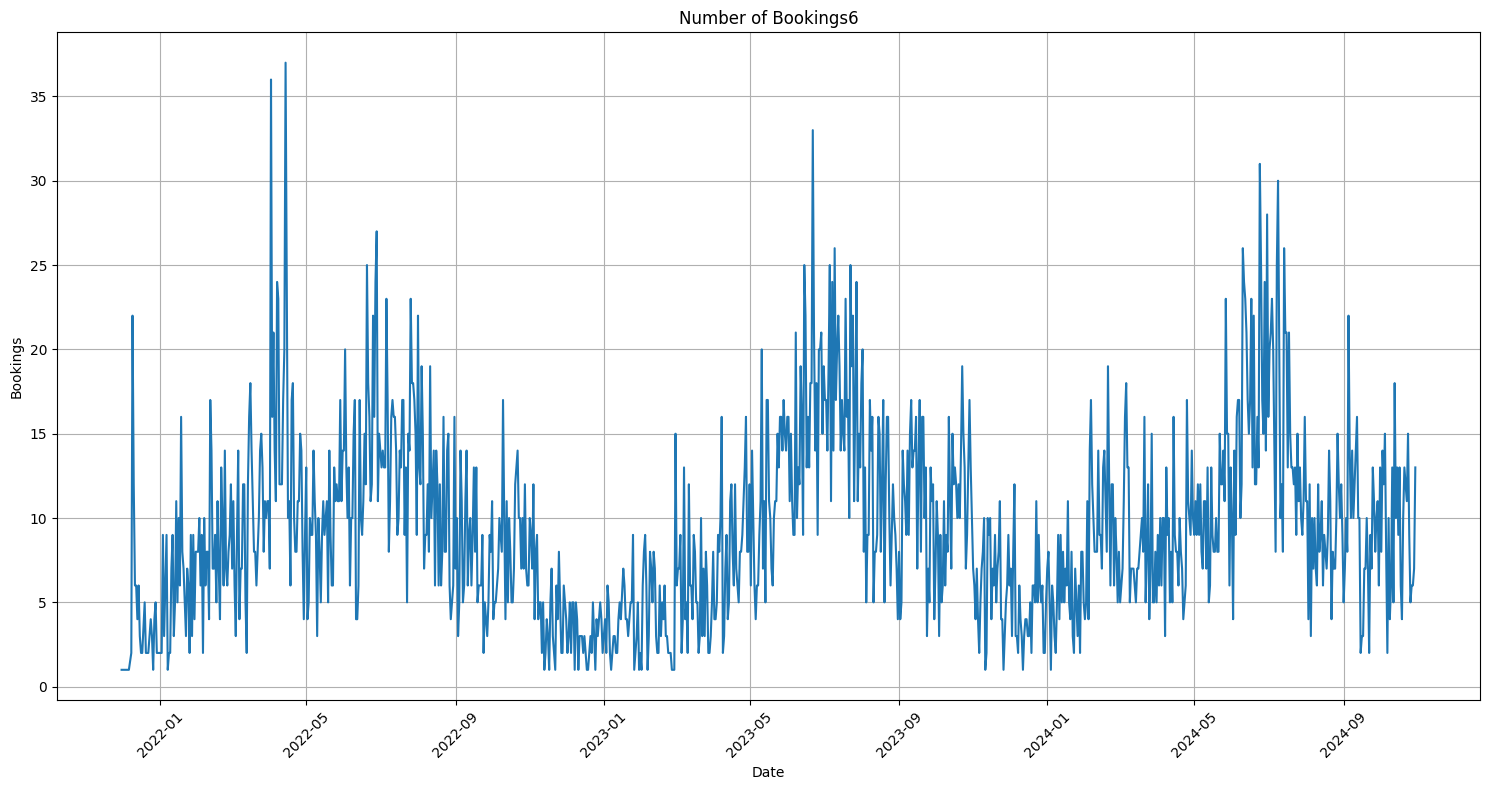

In [ ]:
for id_object in df['id_object'].unique():
  data = df[df['id_object'] == id_object].groupby('date_book')['target'].sum()
  plt.figure(figsize=(15, 8))
  plt.plot(data.index, data)
  plt.title('Number of Bookings' + str(id_object))
  plt.xlabel('Date')
  plt.ylabel('Bookings')
  plt.grid()
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1504wfs0/kgq58s97.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1504wfs0/hhbv15dr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76621', 'data', 'file=/tmp/tmp1504wfs0/kgq58s97.json', 'init=/tmp/tmp1504wfs0/hhbv15dr.json', 'output', 'file=/tmp/tmp1504wfs0/prophet_modele8sic780/prophet_model-20250319192757.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:27:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:27:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Found custom seasonality named 'ye

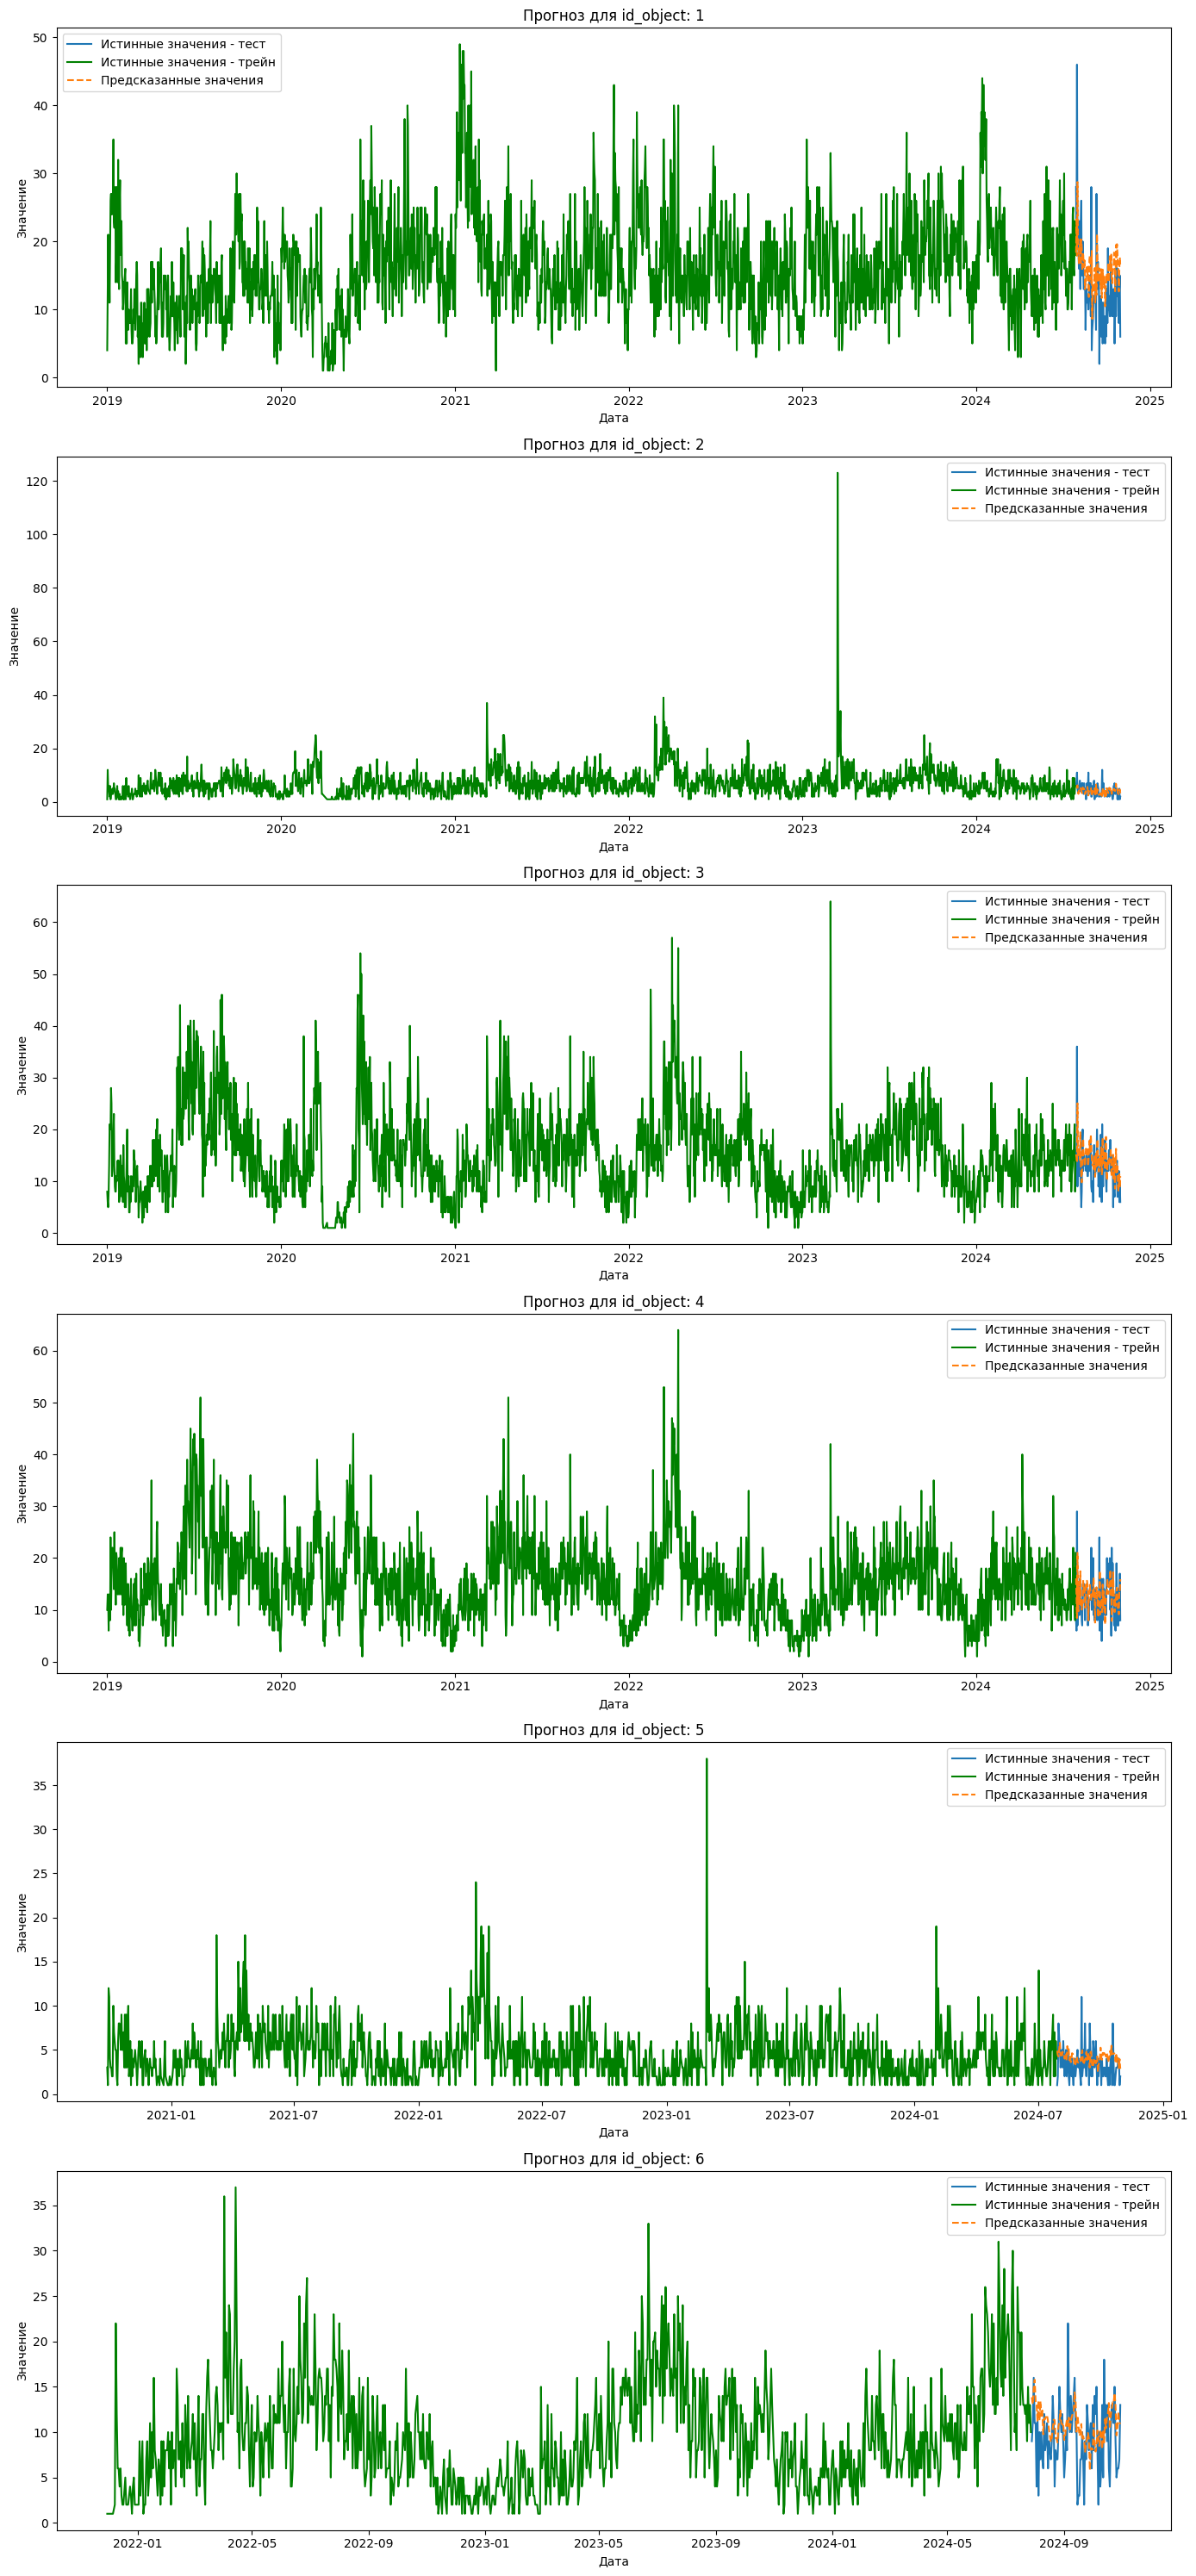

Mean Squared Error: 20.706032871179303


In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

agg_df = df.groupby(['id_object', 'date_book']).agg({'target': 'sum'}).reset_index().merge(df[['id_object', 'date_book', 'working_day',
       'week_trend', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday',
       'saturday', 'sunday', 'month_trend', 'year_trend', 'jan', 'feb', 'mar',
       'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'T_mean',
       'T_min', 'T_max', 'T_sd', 'U_mean', 'U_min', 'U_max', 'U_sd', 'Ff_mean',
       'Ff_min', 'Ff_max', 'Ff_sd', 'N_mean', 'N_min', 'N_max', 'N_sd',
       'Nh_mean', 'Nh_min', 'Nh_max', 'Nh_sd', 'H_mean', 'H_min', 'H_max',
       'H_sd', 'VV_mean', 'VV_min', 'VV_max', 'VV_sd', 'Td_mean', 'Td_min',
       'Td_max', 'Td_sd']].drop_duplicates(), on=['id_object', 'date_book'], how = 'left')
agg_df.rename(columns={'date_book': 'ds', 'target': 'y'}, inplace=True)

agg_df['Lag_1'] = agg_df.groupby('id_object')['y'].shift(1)
agg_df['Lag_7'] = agg_df.groupby('id_object')['y'].shift(7)
agg_df['Lag_30'] = agg_df.groupby('id_object')['y'].shift(30)
agg_df['Lag_365'] = agg_df.groupby('id_object')['y'].shift(365)

agg_df.fillna(0, inplace=True)

train_df = agg_df[agg_df['ds'] < '2024-07-29']
test_df = agg_df[agg_df['ds'] >= '2024-07-29']

forecasts = []
regressors = ['working_day',
       'week_trend', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday',
       'saturday', 'sunday', 'month_trend', 'year_trend', 'jan', 'feb', 'mar',
       'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'T_mean',
       'T_min', 'T_max', 'T_sd', 'U_mean', 'U_min', 'U_max', 'U_sd', 'Ff_mean',
       'Ff_min', 'Ff_max', 'Ff_sd', 'N_mean', 'N_min', 'N_max', 'N_sd',
       'Nh_mean', 'Nh_min', 'Nh_max', 'Nh_sd', 'H_mean', 'H_min', 'H_max',
       'H_sd', 'VV_mean', 'VV_min', 'VV_max', 'VV_sd', 'Td_mean', 'Td_min',
       'Td_max', 'Td_sd', 'Lag_1', 'Lag_7', 'Lag_30', 'Lag_365']

for id_object, group in train_df.groupby('id_object'):
    model_prophet = Prophet()
    model_prophet.add_seasonality(name = 'yearly',
                          period = 365.24,
                          fourier_order = 10,
                          mode = 'multiplicative')
    for regressor in regressors:
      model_prophet.add_regressor(regressor)

    model_prophet.fit(group)

    future = test_df[test_df['id_object'] == id_object][['ds'] + regressors]

    forecast = model_prophet.predict(future)

    forecast['id_object'] = id_object

    forecasts.append(forecast)

final_forecast = pd.concat(forecasts, ignore_index=True)
final_forecast['yhat'] = final_forecast['yhat'].clip(lower=0)

unique_id_objects = agg_df['id_object'].unique()
num_id_objects = len(unique_id_objects)

fig, axes = plt.subplots(num_id_objects, 1, figsize=(14, 5 * num_id_objects))

for ax, id_object in zip(axes, unique_id_objects):
    group_test = test_df[test_df['id_object'] == id_object]
    ax.plot(group_test['ds'], group_test['y'], label='Истинные значения - тест')

    group_train = train_df[train_df['id_object'] == id_object]
    ax.plot(group_train['ds'], group_train['y'], label='Истинные значения - трейн', color = 'green')

    group_forecast = final_forecast[final_forecast['id_object'] == id_object]
    ax.plot(group_forecast['ds'], group_forecast['yhat'], label='Предсказанные значения', linestyle='--')

    ax.set_title(f'Прогноз для id_object: {id_object}')
    ax.set_xlabel('Дата')
    ax.set_ylabel('Значение')
    ax.legend()

plt.tight_layout()
plt.show()

mse = mean_squared_error(test_df['y'], final_forecast[final_forecast['ds'] >= '2024-07-29']['yhat'])
print(f'Mean Squared Error: {mse}')

In [ ]:
final_forecast.merge(test_df[['id_object', 'ds', 'y']], on = ['id_object', 'ds']).to_excel('profet.xlsx', index = False)

In [ ]:
final_forecast.to_excel('profet.xlsx', index = False)

In [ ]:
rmse = mean_squared_error(test_df['y'], final_forecast[final_forecast['ds'] >= '2024-07-29']['yhat'])** 0.5

print(f'RMSE: {rmse:.2f}')

RMSE: 4.55


In [ ]:
for id_object in df['id_object'].unique():
  y_true = test_df[test_df['id_object'] == id_object]['y']
  y_pred = final_forecast[(final_forecast['ds'] >= '2024-07-29') & (final_forecast['id_object'] == id_object)]['yhat']

  rmse = mean_squared_error(y_true, y_pred) ** 0.5
  print(str(id_object) + " ------ " + str(rmse))

1 ------ 10.08140252768519
2 ------ 2.58153560457529
3 ------ 6.47937890898474
4 ------ 5.022790697627634
5 ------ 2.371703838833537
6 ------ 4.1739619608554674


In [ ]:
y_true = test_df['y']
y_pred = final_forecast[final_forecast['ds'] >= '2024-07-29']['yhat']

mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f'MAPE: {mape:.2f}%')

MAPE: 63.00%


In [ ]:
for id_object in df['id_object'].unique():
  y_true = test_df[test_df['id_object'] == id_object]['y']
  y_pred = final_forecast[(final_forecast['ds'] >= '2024-07-29') & (final_forecast['id_object'] == id_object)]['yhat']

  mape = np.mean(np.abs((y_true - y_pred) / y_true))
  print(str(id_object) + " ------ " + str(mape))

1 ------ 0.7482567858397384
2 ------ 0.5432620383188501
3 ------ 0.5550237076132197
4 ------ 0.42707260462583635
5 ------ 1.0014627527394393
6 ------ 0.5186822155321459


In [ ]:
agg_prediction = final_forecast[final_forecast['ds'] >= '2024-07-29'][['id_object', 'ds', 'yhat']].merge(test_df[['id_object', 'ds', 'y']], on = ['id_object', 'ds'])

def calculate_rolling_sums(df, group_cols, target_col, window):
    df = df.set_index('ds')

    rolling_result = (
        df.groupby(group_cols)[target_col]
        .rolling(window=window)
        .agg(['sum'])
        .reset_index()
    )

    rolling_result.rename(columns={'sum': f'{window}_Day_Sum_{target_col}'}, inplace=True)
    df = df.merge(rolling_result, on= group_cols + ['ds'], how='left')
    return df


agg_prediction = calculate_rolling_sums(agg_prediction, ['id_object'], 'y', 7)
agg_prediction = calculate_rolling_sums(agg_prediction, ['id_object'], 'yhat', 7)

agg_prediction = calculate_rolling_sums(agg_prediction, ['id_object'], 'y', 14)
agg_prediction = calculate_rolling_sums(agg_prediction, ['id_object'], 'yhat', 14)

agg_prediction = calculate_rolling_sums(agg_prediction, ['id_object'], 'y', 30)
agg_prediction = calculate_rolling_sums(agg_prediction, ['id_object'], 'yhat', 30)

agg_prediction['Index'] = agg_prediction.groupby(['id_object']).cumcount() + 1


agg_prediction['Label_7'] = np.where(agg_prediction['Index'] % 7 == 0, 1, np.NaN)
agg_prediction['Label_14'] = np.where(agg_prediction['Index'] % 14 == 0, 1, np.NaN)
agg_prediction['Label_30'] = np.where(agg_prediction['Index'] % 30 == 0, 1, np.NaN)

agg_prediction.set_index('ds', inplace=True)

In [ ]:
for id_object in agg_prediction['id_object'].unique():

  seven_days_true = agg_prediction[(agg_prediction['id_object'] == id_object) & (agg_prediction['Label_7'] == 1)]['7_Day_Sum_y']
  seven_days_pred = agg_prediction[(agg_prediction['id_object'] == id_object) & (agg_prediction['Label_7'] == 1)]['7_Day_Sum_yhat']

  fourteen_days_true = agg_prediction[(agg_prediction['id_object'] == id_object) & (agg_prediction['Label_14'] == 1)]['14_Day_Sum_y']
  fourteen_days_pred = agg_prediction[(agg_prediction['id_object'] == id_object) & (agg_prediction['Label_14'] == 1)]['14_Day_Sum_yhat']

  thirty_days_true = agg_prediction[(agg_prediction['id_object'] == id_object) & (agg_prediction['Label_30'] == 1)]['30_Day_Sum_y']
  thirty_days_pred = agg_prediction[(agg_prediction['id_object'] == id_object) & (agg_prediction['Label_30'] == 1)]['30_Day_Sum_yhat']

  mape_7 = np.mean(np.abs((seven_days_true - seven_days_pred) / seven_days_true))
  mape_14 = np.mean(np.abs((fourteen_days_true - fourteen_days_pred) / fourteen_days_true))
  mape_30 = np.mean(np.abs((thirty_days_true - thirty_days_pred) / thirty_days_true))

  rmse_7 = mean_squared_error(seven_days_true, seven_days_pred)** 0.5
  rmse_14 = mean_squared_error(fourteen_days_true, fourteen_days_pred)** 0.5
  rmse_30 = mean_squared_error(thirty_days_true, thirty_days_pred)** 0.5


  print(str(id_object) + " ------ mape 7: " + str(mape_7) + " ------ mape 14: " + str(mape_14) + " ------ mape 30: " + str(mape_30) +\
        " ------ rmse 7: " + str(rmse_7) + " ------ rmse 14: " + str(rmse_14) + " ------ rmse 30: " + str(rmse_30))

1 ------ mape 7: 0.5305750499144147 ------ mape 14: 0.48458192824182883 ------ mape 30: 0.4094845679359764 ------ rmse 7: 45.08340356886902 ------ rmse 14: 83.16351399438172 ------ rmse 30: 163.7782169555771
2 ------ mape 7: 0.3540084317536557 ------ mape 14: 0.2946634816078077 ------ mape 30: 0.2811053911174944 ------ rmse 7: 11.821722667160866 ------ rmse 14: 22.240420074431437 ------ rmse 30: 46.57967462352857
3 ------ mape 7: 0.37463197802019377 ------ mape 14: 0.3497871689323213 ------ mape 30: 0.357190880961699 ------ rmse 7: 34.113707756485475 ------ rmse 14: 64.59728794226474 ------ rmse 30: 138.9013529507289
4 ------ mape 7: 0.17739479834644292 ------ mape 14: 0.15305824760015632 ------ mape 30: 0.15126646456306572 ------ rmse 7: 17.052015134745236 ------ rmse 14: 28.28562773615102 ------ rmse 30: 58.216341948506575
5 ------ mape 7: 0.39704067796885845 ------ mape 14: 0.38610377252441785 ------ mape 30: 0.3852162730183521 ------ rmse 7: 10.563264707098204 ------ rmse 14: 20.49